In [1]:
import sys
sys.path.insert(1, '../')
from heterogenous_game_theory import *
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
plt.style.use('fivethirtyeight')
seed = 512
np.random.seed(seed)

AGENT PARAMETERS IN POPULATION
-------------------------------------
   M 		  E 		  I
-------------------------------------
| 1024 		 0.1 		 0.1 |
| 1110 		 0.1 		 0.1 |
| 1232 		 0.1 		 0.1 |
| 1007 		 0.1 		 0.1 |
| 1088 		 0.1 		 0.1 |
| 1243 		 0.1 		 0.1 |
| 1061 		 0.1 		 0.1 |
| 1085 		 0.1 		 0.1 |
| 1051 		 0.1 		 0.1 |
| 1176 		 0.1 		 0.1 |
| 1218 		 0.1 		 0.1 |
| 1010 		 0.1 		 0.1 |
| 1116 		 0.1 		 0.1 |
| 1230 		 0.1 		 0.1 |
| 1038 		 0.1 		 0.1 |
| 1003 		 0.1 		 0.1 |
| 1725 		 0.1 		 0.1 |
| 1041 		 0.1 		 0.1 |
| 1013 		 0.1 		 0.1 |
-------------------------------------
The s.d. of M is: 117.0
The s.d. of E is: 0.0
The s.d. of I is: 0.0
-------------------------------------
The mean of M is: 1105
The mean of E is: 0.1
The mean of I is: 0.1
-------------------------------------


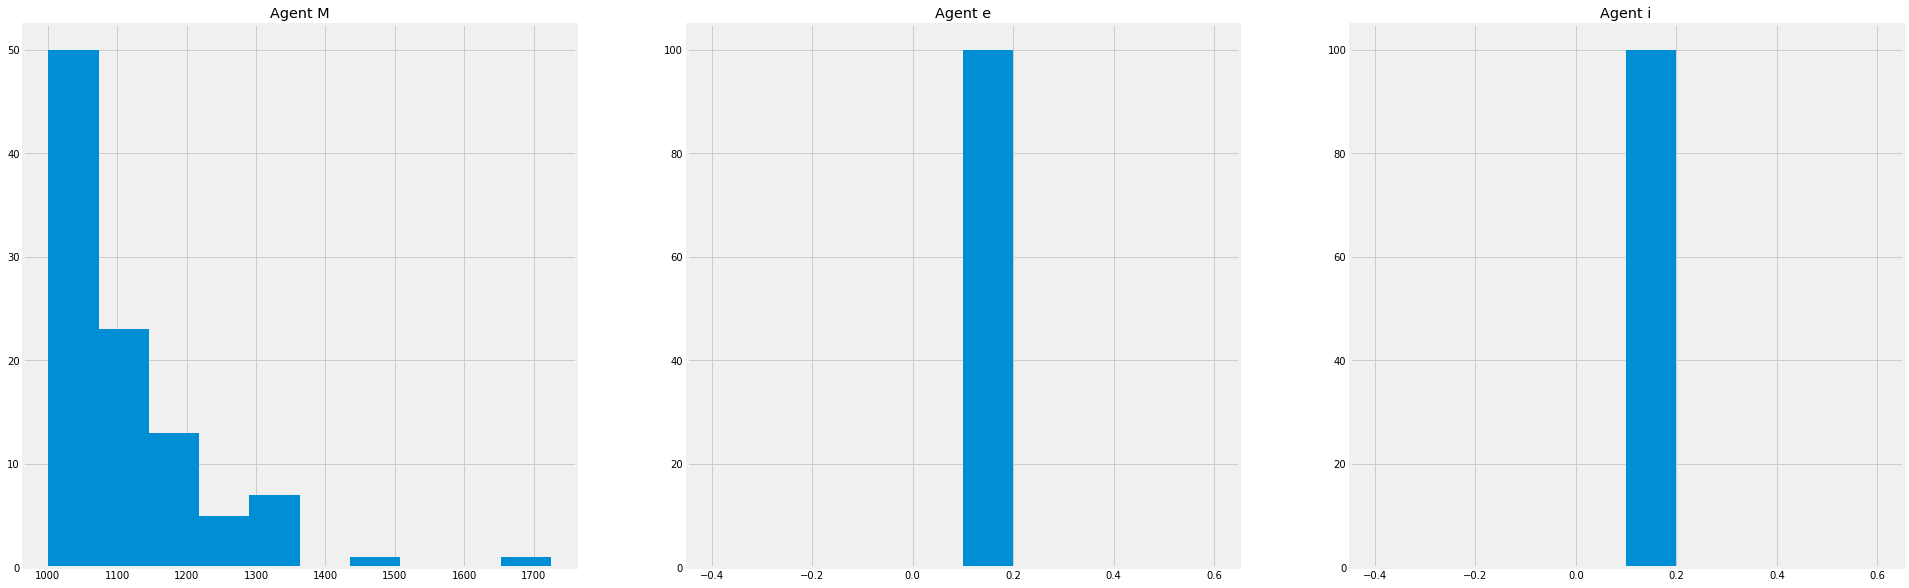

____________________________________________________________________________________________________
Agent 0 playing Agent 1: Reward: 100.0, Temptation: 111.0, Sucker: -11.0, Punishment: 0
Agent 1 playing Agent 0: Reward: 92.0, Temptation: 102.0, Sucker: -10.0, Punishment: 0
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Agent 0 playing Agent 2: Reward: 111.0, Temptation: 123.0, Sucker: -12.0, Punishment: 0
Agent 2 playing Agent 0: Reward: 92.0, Temptation: 102.0, Sucker: -10.0, Punishment: 0
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Agent 0 playing Agent 3: Reward: 91.0, Temptation: 101.0, Sucker: -10.0, Punishment: 0
Agent 3 playing Agent 0: Reward: 92.0, Temptation: 102.0, 

In [2]:
# POWER DISTANCE TEST, FIRST IS LOWEST VALUE, SECOND IS DEGREE OF INEQUALITY
M = ["power",1000, 10]
E = [0.1, 1/10000]
I = [0.1, 1/10000]
power_distance = [M,E,I]

agents = get_agents(homogenous = False, number_of_agents = 100, M = M, E = E, I = I)
check_parameters(agents)
compare_payoff_function(agents, default_payoff_functions)

Tournament has started...
Tournament has ended. The simulation took 25 minutes.
    S.D.  Counts Seed
0    0.5     245  512
1    0.6     256  512
2    0.7     250  512
3    0.8     238  512
4    0.9     202  512
5    1.0     181  512
6    1.1     158  512
7    1.2     132  512
8    1.3     124  512
9    1.4     118  512
10   1.5     109  512
11   1.6      90  512
12   1.7      76  512
13   1.8      63  512
14   1.9      56  512
15   2.0      35  512
16   2.1      25  512
17   2.2      18  512
18   2.3       9  512
19   2.4       7  512
20   2.5       8  512
21   2.6       2  512
22   2.7       3  512
23   2.8       0  512
24   2.9       0  512
25   3.0       0  512


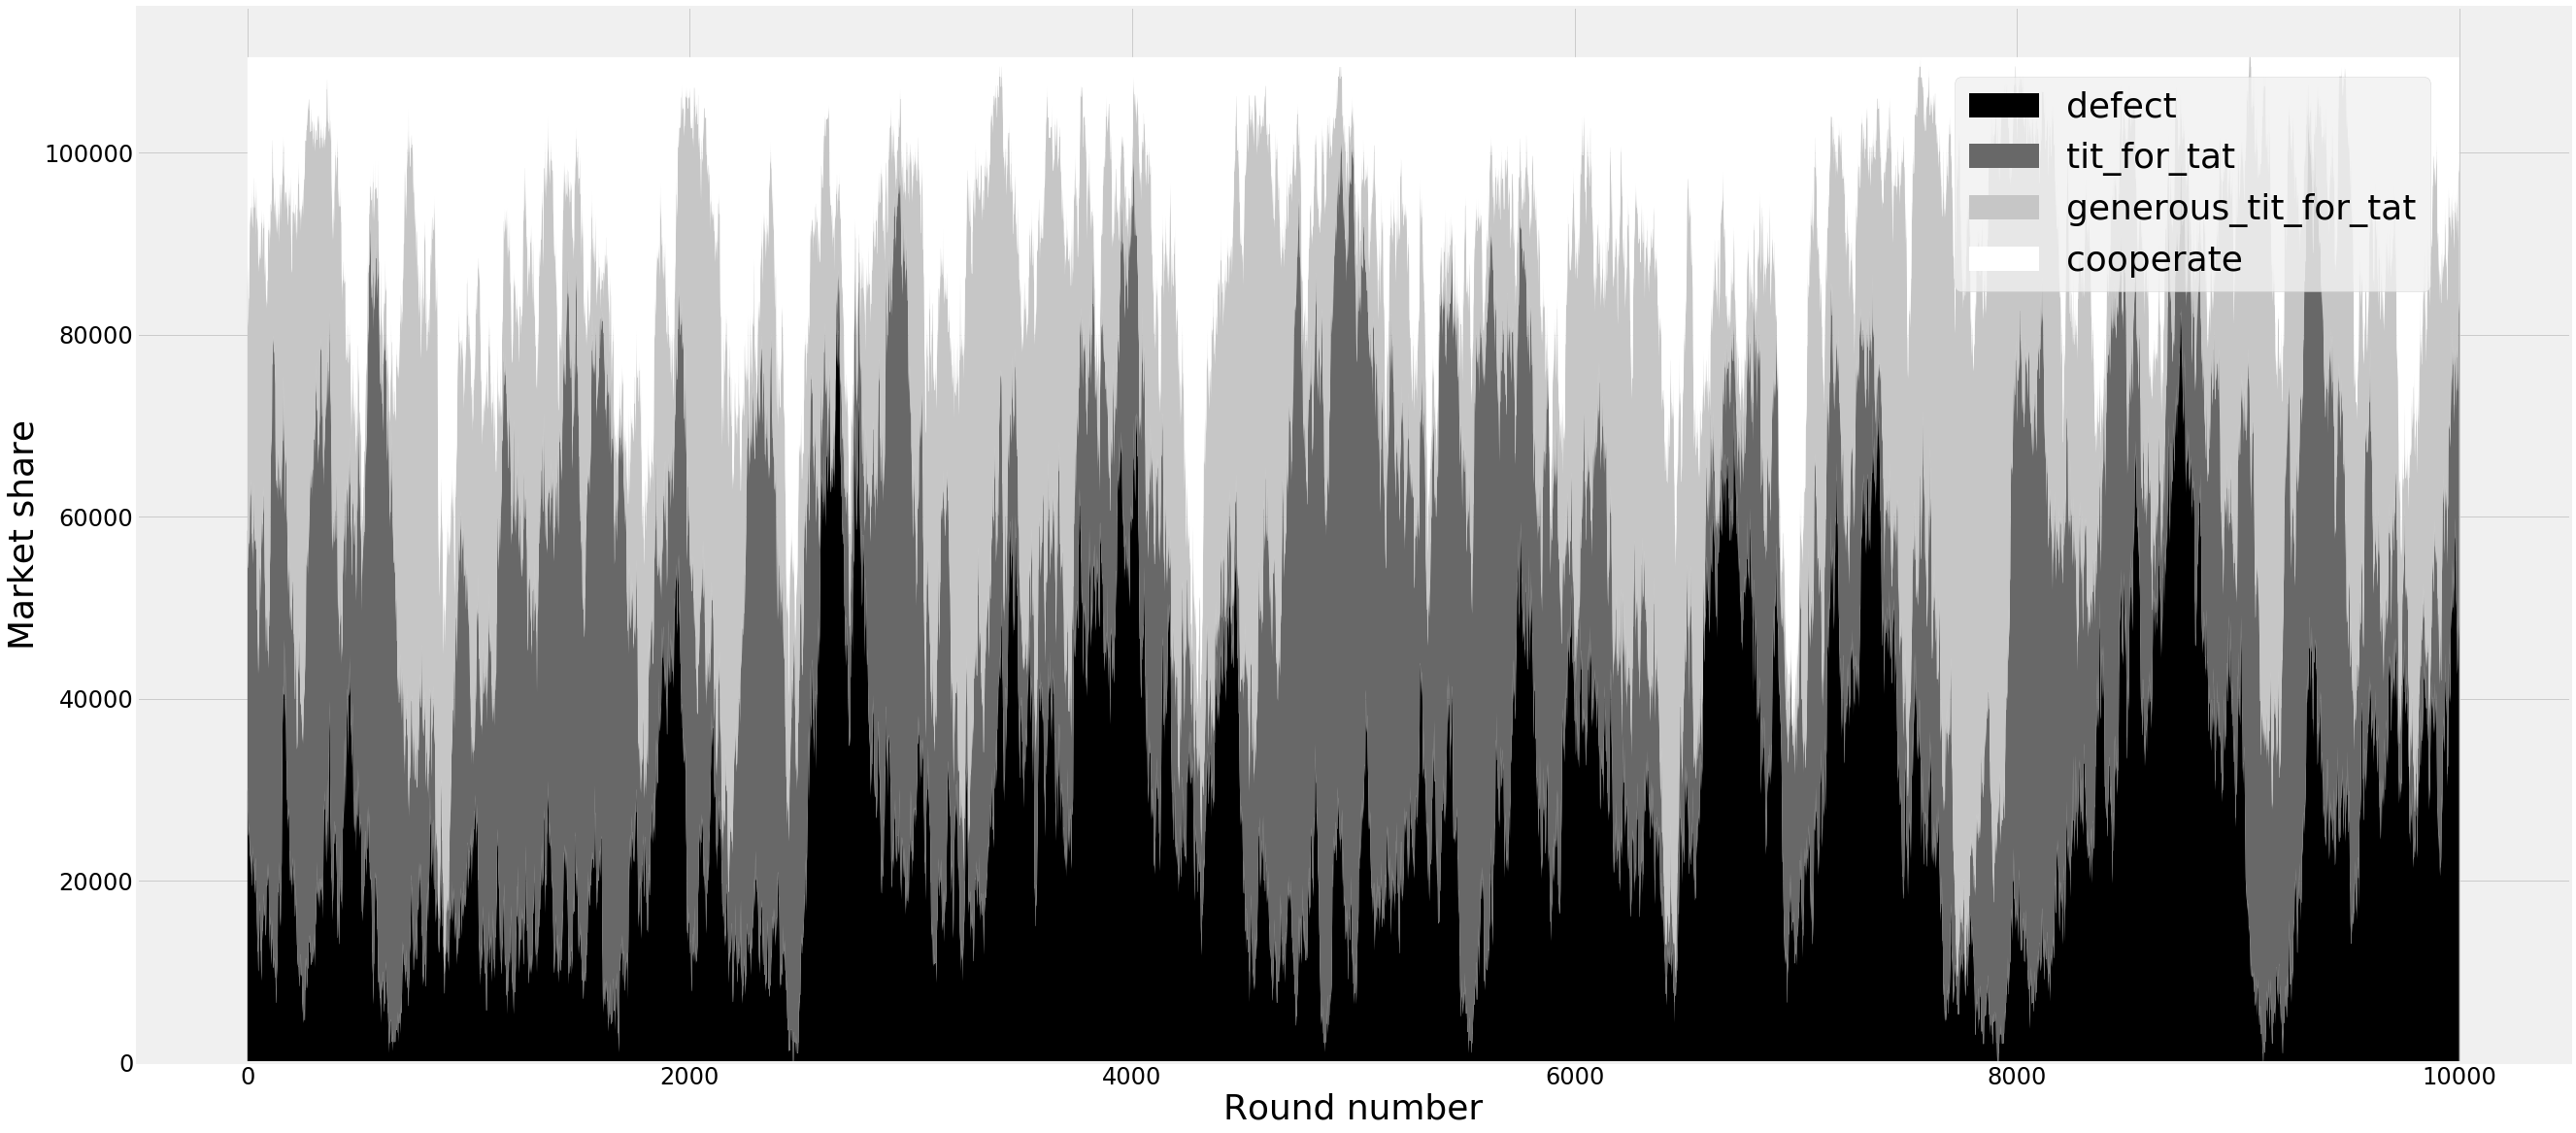

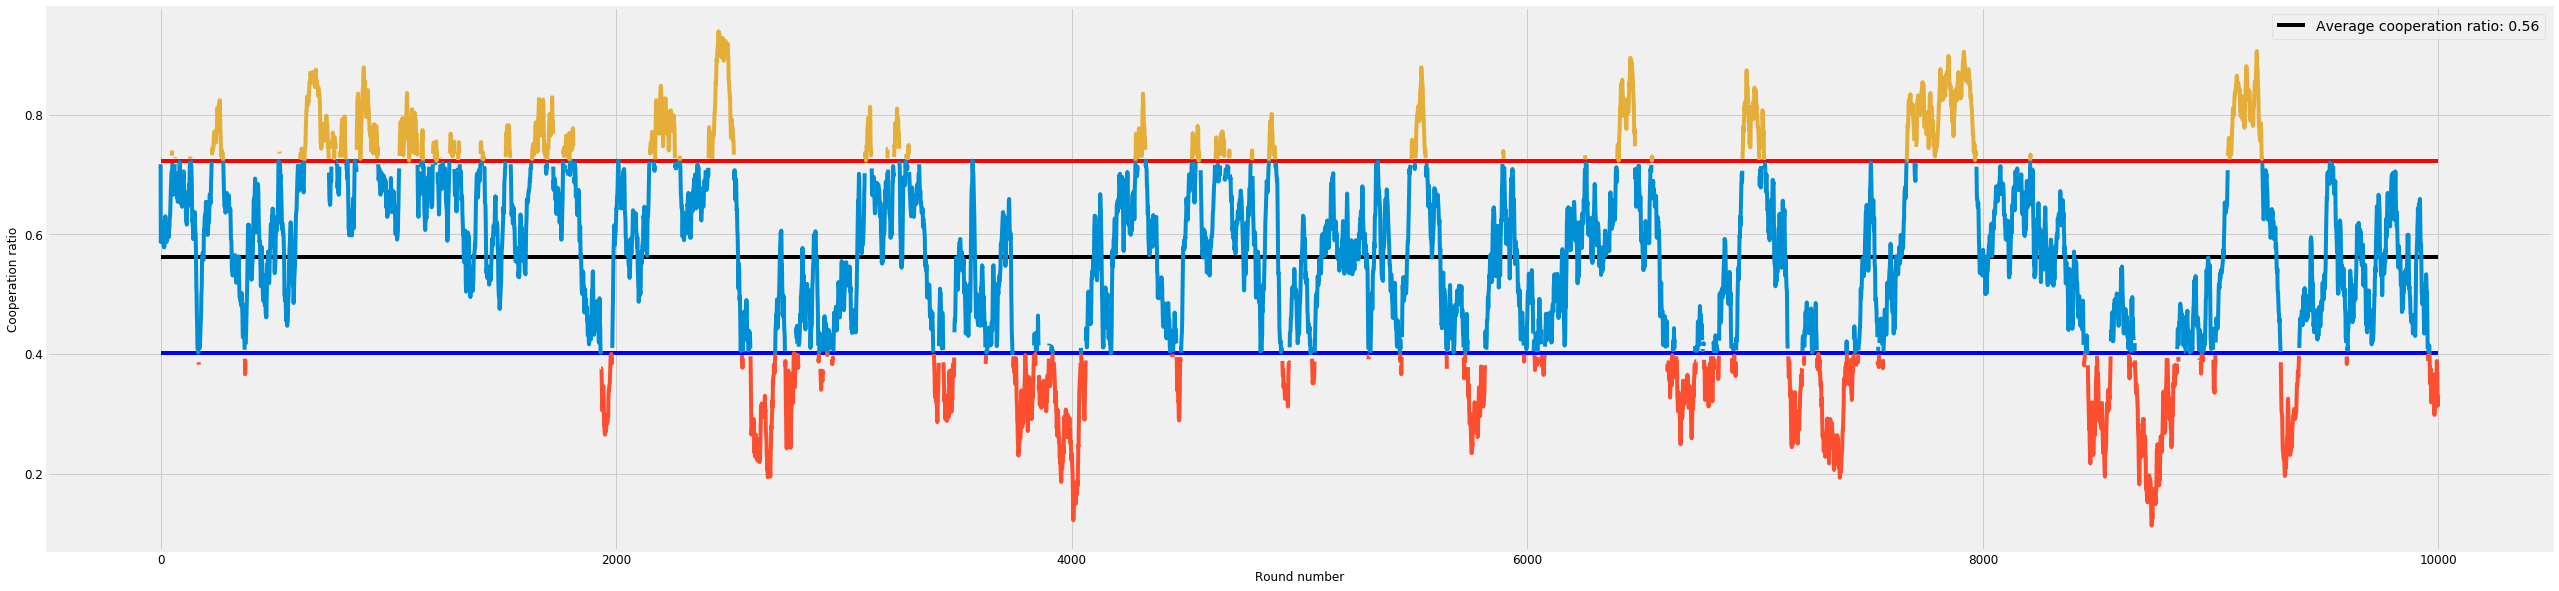

In [3]:
tour = Tournament.create_play_tournament(
                 agents = agents, 
                 max_rounds = 10000, 
                 strategy_list = [defect, tit_for_tat, generous_tit_for_tat, cooperate], 
                 payoff_functions = default_payoff_functions, 
                 surveillance_penalty = True,
                 self_reward = selfreward, #default function
                 playing_each_other = True,
                 nr_strategy_changes = 10,
                 mutation_rate = 0.1,
                 init_fitnes_as_m = False,
                 noise = 0.05,
                 )
draw_stack(tour)
C_D_ratios_per_round_var(tour, constant = 1)
outliers = count_outliers(tour, constants = np.arange(0.5, 3.1, 0.1))
data = {'S.D.': list(outliers.keys()), 'Counts': list(outliers.values()), 'Seed': str(seed)}
df = pd.DataFrame.from_dict(data)
print(df)
df.to_csv("Data/data_" + str(seed) + "_outliercounts.csv", encoding='utf-8', index = False, float_format='%.1f')
save_tournament_csv(tour, type_of_tournament= "_power_law_M", seed = str(seed))